In [1]:
import os
import pandas as pd
import numpy as np


In [2]:
leaguesNamesFolder = [folder for folder in os.listdir() if os.path.isdir(folder)]
leaguesWithOutFolder = ["Youth-Basketball-Champions-League_2023","Zadar-Tournament-(ANGT)_2023"]
noList =[".DS_Store","ORIG_HEAD","config","objects",
"HEAD",
"info",
"logs",
"description",
"hooks",
"refs",
"index",
"packed-refs",
"COMMIT_EDITMSG",
"FETCH_HEAD","Collect_Data-checkpoint.ipynb","Untitled-checkpoint.ipynb",".ipynb_checkpoints",".git"]
dfList =[]
leaguesNamesFolder.remove(".ipynb_checkpoints")
leaguesNamesFolder.remove(".git")
leaguesNamesFolder.remove("Champions_Tables")

##Creating Dataframe with shortcuts and meanings
shortList=["GP","MPG","PPG","FGM","FGA","FG%","3PM","3PA","3P%","FTM","FTA","FT%","ORB","DRB","RPG","APG","SPG","BPG","TOV","PF"]
meaningList = ["Games Played", "Minutes Per Game", "Points Per Game", "Field Goals Attempted", "Field Goals Attempted", "Field Goal Percentage", "3-Point Field Goals Made", "3-Point Field Goals Attempted", "3-Point Field Goal Percentage", "Free Throws Made", "Free Throws Attempted", "Free Throw Percentage", "Offensive Rebounds", "Defensive Rebounds", "Rebounds Per Game", "Assists Per Game", "Steals Per Game", "Blocks Per Game", "Turnovers", "Personal Fouls"]
meaningDf = pd.DataFrame(shortList,meaningList)

##Taking out all Tables and put it in one DataFrame
##Moving thorugh all Folder
for folder in leaguesNamesFolder:
    currPath = os.getcwd()+ os.sep + folder
    allTables = os.listdir(currPath)
    for table in allTables:
        if(table not in noList):
            currdf = pd.read_csv(currPath + os.sep + table)
            dfList.append(currdf)
##Running over all the csvs files in any folder           
for leauge in leaguesWithOutFolder:
    tablePath = os.getcwd()+ os.sep + leauge + ".csv"
    currdf = pd.read_csv(tablePath)
    dfList.append(currdf)

alldf = pd.concat(dfList,axis=0)
alldf = alldf.reset_index(drop=True)
alldf.drop(["Unnamed: 24"],axis =1,inplace=True)
alldf.describe(include="all")

,#,Team,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,League_Name,is_Champion
count,14802.000000,14802,14802.000000,14632.000000,14802.000000,14802.000000,14802.000000,14802.000000,14394.000000,14394.000000,...,14513.000000,14513.000000,14802.000000,14513.000000,14513.000000,14513.000000,14802.000000,14802.000000,14802,12398.000000
unique,NaN,1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN
top,NaN,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NBA,NaN
freq,NaN,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1632,NaN
mean,9.481016,NaN,33.003310,41.256117,82.163849,29.934414,66.314106,0.451642,7.779881,22.930499,...,24.350376,33.965948,16.932232,7.412127,2.662523,14.065093,20.596386,2014.569247,NaN,0.068882
std,7.190147,NaN,20.825934,2.727657,10.746402,4.545344,9.084687,0.032446,1.989668,5.046345,...,3.468602,4.676602,3.768074,1.595103,1.172026,2.262891,2.488699,10.872042,NaN,0.253264
min,1.000000,NaN,1.000000,32.700000,35.000000,13.500000,44.000000,0.232000,0.100000,0.900000,...,9.000000,13.000000,4.000000,1.000000,0.000000,1.000000,4.000000,1947.000000,NaN,0.000000
25%,4.000000,NaN,20.000000,40.000000,75.700000,27.200000,60.825000,0.435000,6.700000,20.500000,...,22.100000,30.900000,14.300000,6.400000,1.900000,12.600000,19.000000,2013.000000,NaN,0.000000
50%,8.000000,NaN,31.000000,40.200000,79.900000,28.900000,63.600000,0.454000,7.800000,23.200000,...,23.700000,33.000000,16.600000,7.200000,2.400000,13.800000,20.500000,2017.000000,NaN,0.000000
75%,13.000000,NaN,39.000000,40.500000,85.500000,31.100000,67.800000,0.472000,9.000000,25.800000,...,25.800000,35.900000,19.100000,8.200000,3.200000,15.200000,22.100000,2021.000000,NaN,0.000000


In [3]:
## Need To take Out Venzuelian,ProA,BLitz all those leagues dont have champion label so they are useless
firstClean = ["Venezuelan-SLB","German-Pro-A","NBL-Blitz","Basketball-Champions-League-","Intercontinental-Cup","VTB-SuperCup","VTB-United-League"]
for i in firstClean:
    mask = alldf["League_Name"] != i
    alldf = alldf[mask]


## We are in 2023 and not all leagues Were done so if it doenst we Clean it beacuse we dont know who is the champion
mask = (alldf["Year"] != 2023) & (alldf["is_Champion"].notna())
alldf = alldf[mask]

alldf.drop_duplicates(inplace=True)
alldf.describe(include="all")

### There is mmissing values in old leauges and we cant predict their statstics by mean or anything and we still have enough data so we consider to remove it
dropmask = (alldf["3PM"].notna())| (alldf["3PA"].notna()) | (alldf["3PA"].notna())
alldf[dropmask].describe(include="all")
clndf = alldf[mask]
clndf= alldf[dropmask]
clndf.info()


clndf.to_csv("clnAllTeams.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11557 entries, 0 to 14771
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #            11557 non-null  int64  
 1   Team         11557 non-null  object 
 2   GP           11557 non-null  int64  
 3   MPG          11557 non-null  float64
 4   PPG          11557 non-null  float64
 5   FGM          11557 non-null  float64
 6   FGA          11557 non-null  float64
 7   FG%          11557 non-null  float64
 8   3PM          11557 non-null  float64
 9   3PA          11557 non-null  float64
 10  3P%          11557 non-null  float64
 11  FTM          11557 non-null  float64
 12  FTA          11557 non-null  float64
 13  FT%          11557 non-null  float64
 14  ORB          11557 non-null  float64
 15  DRB          11557 non-null  float64
 16  RPG          11557 non-null  float64
 17  APG          11557 non-null  float64
 18  SPG          11557 non-null  float64
 19  BPG 

C:\Users\Yair\AppData\Local\Temp\ipykernel_19964\198209180.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clndf = alldf[mask]


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each relevant league stat

exclude_cols = ['League_Name', 'Team', 'is_Champion', 'Year']

for stat in alldf.columns:
    if stat not in exclude_cols:
        plt.figure()
        sns.boxplot(x='is_Champion', y=stat, data=alldf)
        plt.title(f'Box Plot of {stat} by Champion Label')
        plt.show()

NameError: name 'alldf' is not defined

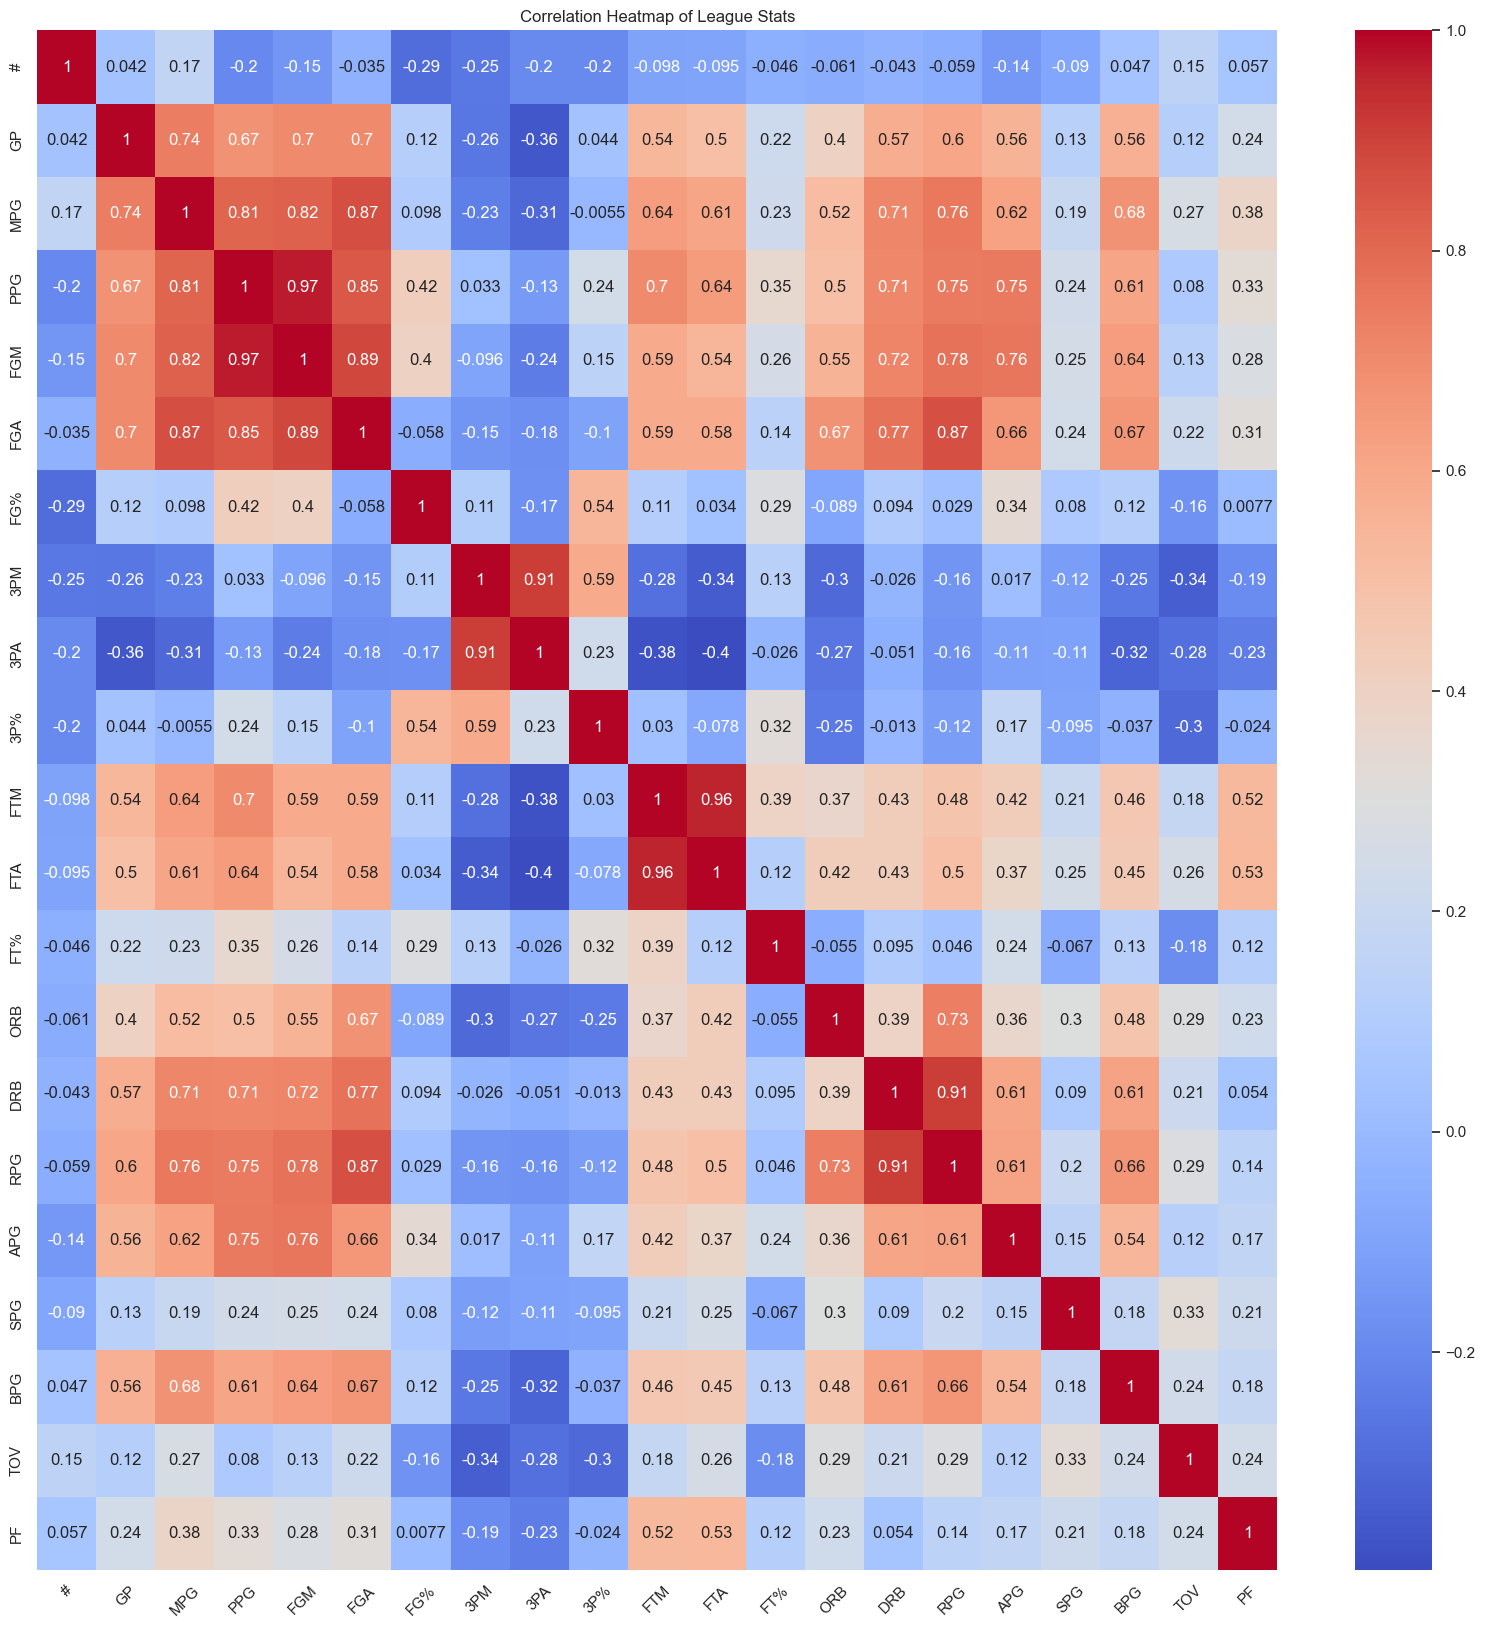

In [29]:
# Set the figure size and font size for the heatmap
plt.figure(figsize=(20, 20))  # Adjust the width and height as needed
sns.set(font_scale=1)  # Adjust the font scale as needed

# Exclude specific columns from the correlation matrix

corr_matrix = alldf.drop(exclude_cols, axis=1).corr()

# Create the heatmap with adjusted figure size and font size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap of League Stats')

# Rotate the tick labels on the x-axis
plt.xticks(rotation=45)

# Show the heatmap
plt.show()